In [1]:
pip install plotly

You should consider upgrading via the '/Users/rashidesai/anaconda3/bin/python -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import re
import string
import nltk
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')

nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer as SIA
from wordcloud import WordCloud,STOPWORDS

plt.rc('figure',figsize=(17,13))
import plotly.express as px
import plotly.graph_objs as go
import plotly.offline as pyo
from plotly.subplots import make_subplots


[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/rashidesai/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [3]:
pip install vaderSentiment

You should consider upgrading via the '/Users/rashidesai/anaconda3/bin/python -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [4]:
pip install twython

You should consider upgrading via the '/Users/rashidesai/anaconda3/bin/python -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [5]:
data = pd.read_csv('/Users/rashidesai/Downloads/Vader_data.csv')  

In [6]:
data.head()

Datetime  Week      Tweet Id        Username  Like Count  \
0  2021-01-01     1  1.345140e+18       QuantData           0   
1  2021-01-01     1  1.345120e+18        bosfloss           3   
2  2021-01-01     1  1.345120e+18      like_argue           0   
3  2021-01-01     1  1.345120e+18  AdmiralWilhelm           0   
4  2021-01-01     1  1.345120e+18   LockeLiberal1           1   

            Display Name                                    Text_lemmatized  \
0             Quant Data  astrazeneca expects supply 2m dos covid19 vacc...   
1          Jackie Haddon  r_impiombato people make living tourism disadv...   
2          Wet Ass Pword  america starting 2021 227315 new covid case 34...   
3       Johannes Wilhelm  cnn u surpasses 20 million covid19 case expert...   
4  Glorious Leader Locke  r_h_ebright christosargyrop polychotomy __ice9...   

    cpos   cneg  
0  False  False  
1  False  False  
2  False  False  
3  False  False  
4  False  False

In [7]:
data.shape

(2109427, 9)

In [8]:
data['Text_lemmatized'] = data['Text_lemmatized'].str.replace('[^\w\s]','')

<ipython-input-8-b7a7d83f00ab>:1: FutureWarning:

The default value of regex will change from True to False in a future version.



In [9]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
new_words = {
    'cpos': -3.0,
    'cneg': 3.0,
}
analyser = SentimentIntensityAnalyzer()
analyser.lexicon.update(new_words)
scores=[]
for i in range(len(data['Text_lemmatized'])):
    
    score = analyser.polarity_scores(data['Text_lemmatized'][i])
    score=score['compound']
    scores.append(score)
sentiment=[]
for i in scores:
    if i>=0.75:
        sentiment.append('Overly Positive')
    elif (i>=0.05) and (i<0.75):
        sentiment.append('Positive')
    elif i<=(-0.75):
        sentiment.append('Overly Negative')
    elif (i<=-0.05) and (i>-0.75):
        sentiment.append('Negative')
    else:
        sentiment.append('Neutral')
data['sentiment']= pd.Series(np.array(sentiment))

In [10]:
data['score']= pd.Series(np.array(scores))

In [11]:
data.head()

Datetime  Week      Tweet Id        Username  Like Count  \
0  2021-01-01     1  1.345140e+18       QuantData           0   
1  2021-01-01     1  1.345120e+18        bosfloss           3   
2  2021-01-01     1  1.345120e+18      like_argue           0   
3  2021-01-01     1  1.345120e+18  AdmiralWilhelm           0   
4  2021-01-01     1  1.345120e+18   LockeLiberal1           1   

            Display Name                                    Text_lemmatized  \
0             Quant Data  astrazeneca expects supply 2m dos covid19 vacc...   
1          Jackie Haddon  r_impiombato people make living tourism disadv...   
2          Wet Ass Pword  america starting 2021 227315 new covid case 34...   
3       Johannes Wilhelm  cnn u surpasses 20 million covid19 case expert...   
4  Glorious Leader Locke  r_h_ebright christosargyrop polychotomy __ice9...   

    cpos   cneg sentiment   score  
0  False  False   Neutral  0.0000  
1  False  False  Negative -0.0772  
2  False  False  Positive  0.1779  
3  False  False  Negative -0.1027  
4  False  False  Negative -0.5553

In [21]:
data.shape

(2109427, 11)

In [12]:
data[data['cpos'] == True]

Datetime  Week      Tweet Id       Username  Like Count  \
1296     2021-01-01     1  1.345120e+18  FormerAntivax           0   
1357     2021-01-01     1  1.345120e+18  Cameron110988           0   
1399     2021-01-01     1  1.345120e+18      Mirrors90           0   
2720     2021-01-01     1  1.345140e+18     MandyC0411           1   
3345     2021-01-01     1  1.345140e+18   zerotogoldca           0   
...             ...   ...           ...            ...         ...   
2106225  2021-03-31    12  1.377200e+18           _pd5           0   
2106783  2021-03-31    12  1.377210e+18  Tasha68418162           0   
2107500  2021-03-31    12  1.377230e+18   TaruniGandhi           0   
2108075  2021-03-31    12  1.377240e+18         Pran_0           0   
2108951  2021-03-31    12  1.377230e+18      David_C68           0   

                 Display Name  \
1296          Back to the Vax   
1357                  Cameron   
1399      Steve And 99 Others   
2720                   Amanda   
3345             Zero To Gold   
...                       ...   
2106225  Pawan Dalal üáÆüá≥   
2106783                 Tasha   
2107500         Taruni Gandhi   
2108075                  Pran   
2108951        david_cusworth   

                                           Text_lemmatized  cpos   cneg  \
1296     false_pos1t1ve lewisf86850922 brexatius editor...  True  False   
1357     missk_egan like say take number shouldnt even ...  True  False   
1399     caaatattack lockdown vaccine circulation 2021 ...  True  False   
2720     massgovernor massgovernor hotel worker mention...  True  False   
3345     sharkawymd cpos  patient admitted icu ventilat...  True  False   
...                                                    ...   ...    ...   
2106225  ajaykumar00009 one get cpos  even vaccine howe...  True  False   
2106783  vaccines4hcw please explain following retired ...  True  False   
2107500  rt_mediaadvpbcm capt_amarinder come contractin...  True  False   
2108075  c_chithra rmcpost pmoindia single election spe...  True  False   
2108951  rgandy2_gandy davehaymot ukcovid19stats mother...  True  False   

               sentiment   score  
1296     Overly Negative -0.7650  
1357            Negative -0.2960  
1399     Overly Positive  0.8402  
2720     Overly Negative -0.7511  
3345            Negative -0.2263  
...                  ...     ...  
2106225         Negative -0.1426  
2106783         Negative -0.5859  
2107500         Negative -0.6124  
2108075         Positive  0.2598  
2108951         Positive  0.4215  

[2305 rows x 11 columns]

In [14]:
data['Text_lemmatized'][2106225]

'ajaykumar00009 one get cpos  even vaccine however since immunity already build infection wont cause severe illness'

In [15]:
data[data['cneg'] == True]

Datetime  Week      Tweet Id        Username  Like Count  \
5063     2021-01-01     1  1.345100e+18     enriquevbjr          16   
6590     2021-01-01     1  1.345090e+18         mrsratf           2   
9579     2021-01-02     1  1.345410e+18  toribloodworth           3   
10798    2021-01-02     1  1.345420e+18   V_for_Valeska          32   
11567    2021-01-02     1  1.345500e+18      PulpCereal           1   
...             ...   ...           ...             ...         ...   
2100291  2021-03-31    12  1.377250e+18     DavidAnd343           1   
2100658  2021-03-31    12  1.377250e+18     IanRSegura1           0   
2101182  2021-03-31    12  1.377240e+18     lilylake_hi           0   
2101233  2021-03-31    12  1.377240e+18   Weerd_Science           2   
2101332  2021-03-31    12  1.377240e+18    VelcroPoodle           5   

                      Display Name  \
5063         Enrique V. Buenrostro   
6590                            K.   
9579               Tori Bloodworth   
10798    Valeska Halstead, MD, MPH   
11567                  Pulp Cereal   
...                            ...   
2100291                      David   
2100658               Ian R Segura   
2101182                   eddyyyyy   
2101233                Josh Eppard   
2101332   PKMN Trainer Ashley üíõ   

                                           Text_lemmatized   cpos  cneg  \
5063     got second test result back cneg covid19 getti...  False  True   
6590     cleavon_md sped high school teacher 38 yo fema...  False  True   
9579     series great news mom grandma cneg covid mom w...  False  True   
10798    nye 1 celebrated 4yr wedding anniversary 2 sub...  False  True   
11567    kategabrielle already cneg covid thats good si...  False  True   
...                                                    ...    ...   ...   
2100291  rosielillie7 jamesmelville james fellow anti l...  False  True   
2100658  americanair flying back la belize vaccine stil...  False  True   
2101182   layajospe exposed covid getting vaccine got cneg  False  True   
2101233  sammyk77887877 sharklady57 vax cneg still get ...  False  True   
2101332  elderly neighbor soninlaw covid he getting bet...  False  True   

               sentiment   score  
5063     Overly Positive  0.7906  
6590     Overly Positive  0.8020  
9579     Overly Positive  0.8442  
10798    Overly Positive  0.8689  
11567           Positive  0.6249  
...                  ...     ...  
2100291         Positive  0.4019  
2100658         Positive  0.6124  
2101182         Positive  0.5719  
2101233         Positive  0.1280  
2101332  Overly Positive  0.8689  

[1089 rows x 11 columns]

In [16]:
data.groupby(by="sentiment").mean()

Week      Tweet Id  Like Count      cpos      cneg  \
sentiment                                                                 
Negative         6.678817  1.361483e+18   12.491568  0.002451  0.000173   
Neutral          6.888273  1.362032e+18   11.089847  0.000112  0.000041   
Overly Negative  6.804455  1.361817e+18   14.000222  0.004836  0.000154   
Overly Positive  6.792018  1.361793e+18   32.979083  0.000304  0.002829   
Positive         6.747926  1.361682e+18   16.805635  0.000460  0.000709   

                    score  
sentiment                  
Negative        -0.411274  
Neutral          0.000210  
Overly Negative -0.840563  
Overly Positive  0.837640  
Positive         0.422623

In [17]:
temp = data.groupby('sentiment').count()['Text_lemmatized'].reset_index().sort_values(by='Text_lemmatized',ascending=False)
temp.style.background_gradient(cmap='Purples')

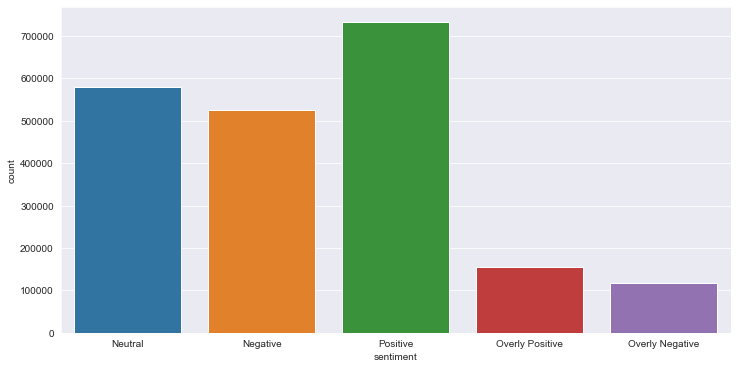

In [18]:
plt.figure(figsize=(12,6))
sns.countplot(x='sentiment',data=data)
fig = go.Figure(go.Funnelarea(
    text =temp.sentiment,
    values = temp.Text_lemmatized,
    title = {"position": "top center", "text": "Funnel-Chart of Sentiment Distribution"}
    ))
fig.show()

<Figure size 432x288 with 0 Axes>

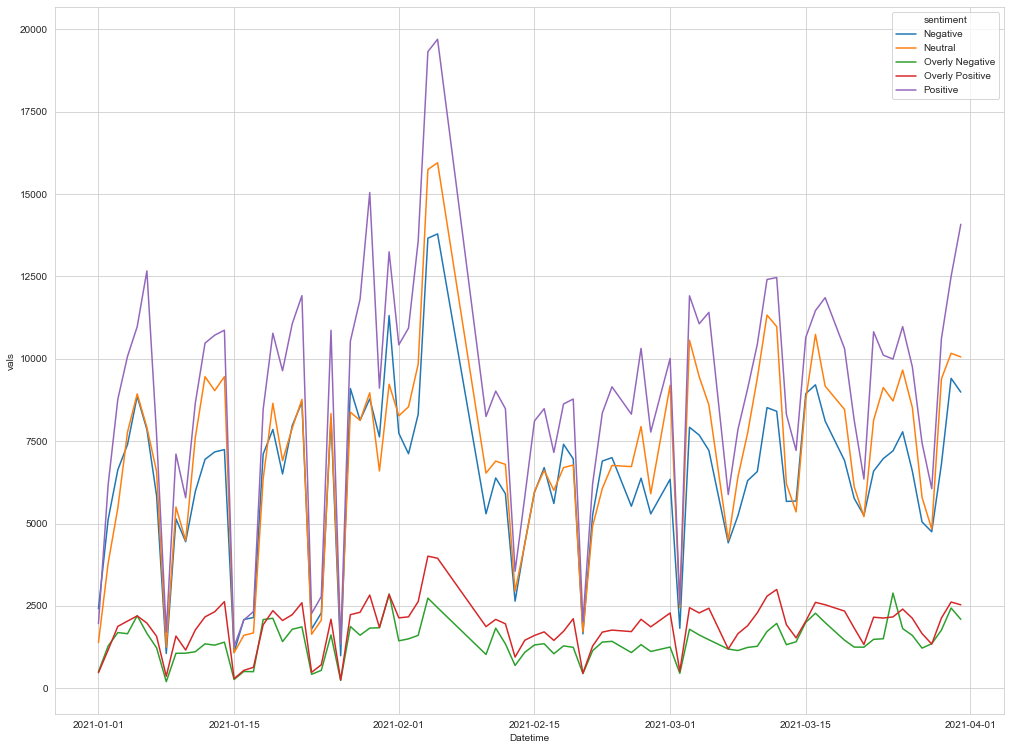

<Figure size 432x288 with 0 Axes>

In [19]:
data["Datetime"] = pd.to_datetime(data.Datetime) 
timeline = data.resample('D', on='Datetime')["sentiment"].value_counts().unstack(1)

timeline.reset_index(inplace=True)

timeline = timeline.melt("Datetime", var_name='sentiment',  value_name='vals')

sns.set_style("whitegrid")
sns.lineplot(x="Datetime", y="vals", hue="sentiment", data=timeline)
plt.figure(figsize=(6,4))

In [20]:
data.to_csv(r'/Users/rashidesai/Downloads/sentiment_analysis_final.csv', index = False)